In [1]:
from __future__ import division, print_function

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20

In [2]:
import os
import ketu
import numpy as np
import matplotlib.pyplot as pl

In [3]:
campaign = 1
epicid = "201367065"
# epicid = "201912552"
# epicid = "201649426"
basepath = "/Users/dfm/data/k2"
light_curve_file = os.path.join(basepath, "lightcurves/c{0}".format(campaign),
                                "{0}00000/{1}000/ktwo{2}-c{3:02d}_lpd-lc.fits"
                                .format(epicid[:4], epicid[4:6], epicid, campaign))

query = dict(
    light_curve_file=light_curve_file,
    basis_file=os.path.join(basepath, "elcs/c{0}-norm.h5".format(campaign)),
    catalog_file=os.path.join(basepath, "catalogs/epic.h5"),
    nbasis=500,
    initial_time=1975.0,
    skip=50,
#     initial_time=2015.,
#     skip=0,
    durations=[0.05, 0.1, 0.2],
    min_period=3.,
    max_period=50.,
    npeaks=4,
    # use_gp=False,
)

In [4]:
pipe = ketu.k2.Data(cache=False)
pipe = ketu.k2.Likelihood(pipe, cache=False)
pipe = ketu.OneDSearch(pipe, cache=True)
# pipe = ketu.TwoDSearch(pipe, cache=False)
pipe = ketu.IterativeTwoDSearch(pipe, cache=True, clobber=True)
pipe = ketu.Vetter(pipe, cache=False)

In [5]:
r = pipe.query(**query)

Using cached value in OneDSearch
Querying IterativeTwoDSearch
Querying Data
Finished querying Data in 0.54s
Querying Likelihood
tau = 8.85250854492
tau = 8.85250854492
tau = 9.86840820312
tau = 9.86840820312
Finished querying Likelihood in 5.07s
Finished querying IterativeTwoDSearch in 156.70s
Querying Vetter
Finished querying Vetter in 6.57s


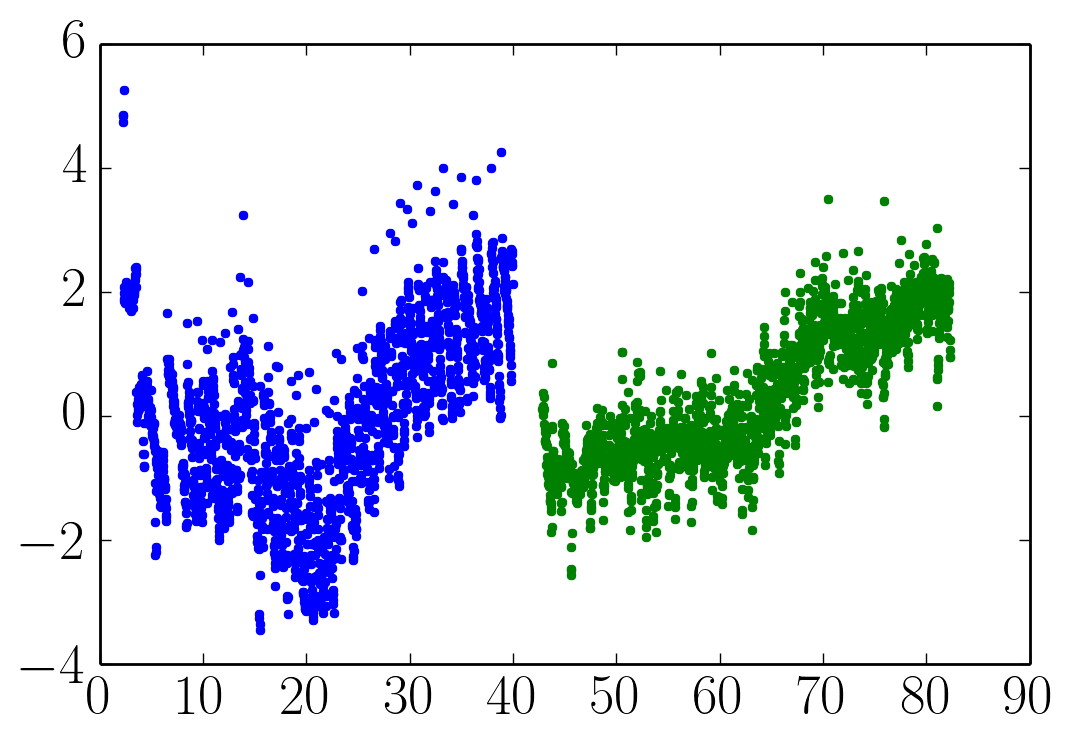

In [6]:
lcs = r.model_light_curves
[pl.plot(lc.time, lc.flux, ".") for lc in lcs];

In [7]:
lc = lcs[0]

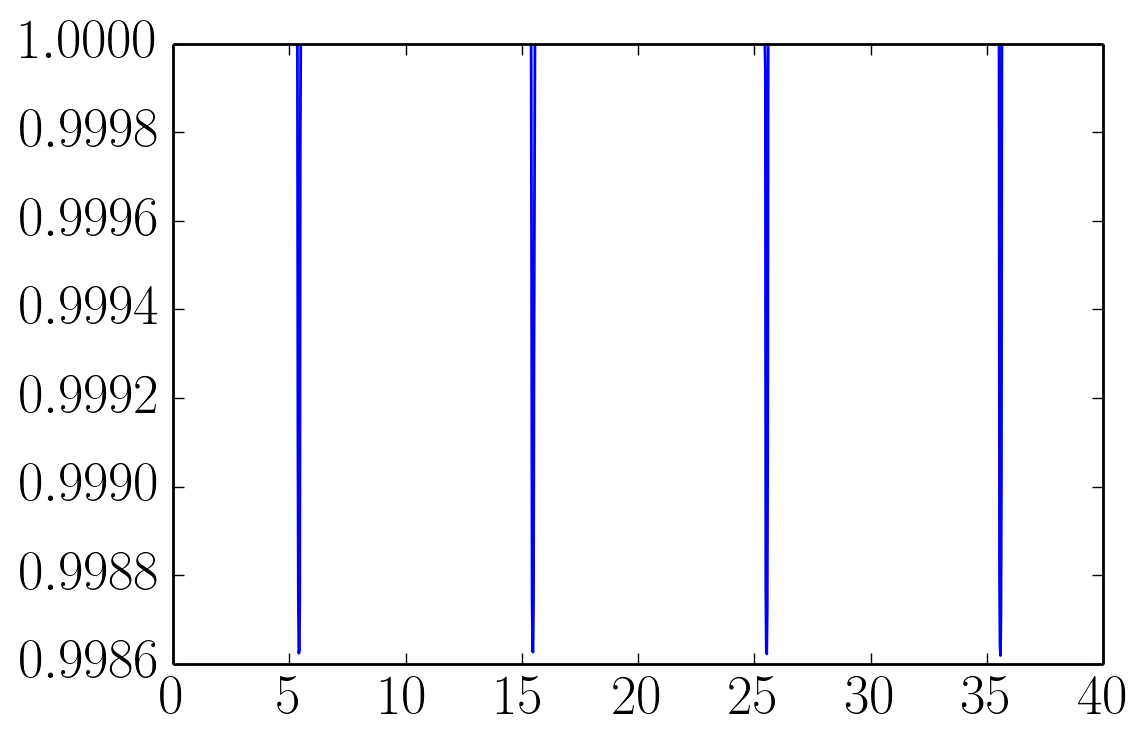

In [8]:
from transit import SimpleSystem
p = r.peaks[0]
s = SimpleSystem(period=p["transit_period"],
                 t0=p["transit_t0"],
                 ror=p["transit_ror"],
                 impact=p["transit_b"],
                 duration=p["transit_duration"],
                 q1=p["transit_q1"],
                 q2=p["transit_q2"])

pl.plot(lc.time, s.light_curve(lc.time))

In [9]:
r.peaks

[{'depth': 1.0382376070054353,
  'depth_ivar': 890.89570484162357,
  'duration': 0.1,
  'lnZ_box': -812.3640563334427,
  'lnZ_none': -1405.6206062370325,
  'lnZ_transit': -763.1768815303858,
  'lnlike_box': -809.88726454229629,
  'lnlike_none': -1405.6206062370325,
  'lnlike_transit': -742.58032484025284,
  'period': 10.05449508141246,
  'phic_same': -1376.9106915544276,
  'phic_same_second': -1525.3896281796306,
  'phic_variable': -14465.62590410799,
  's2n': 30.989187406876706,
  't0': 5.4124511718749915,
  'transit_b': 0.0,
  'transit_duration': 0.10725575339659463,
  'transit_period': 10.054256654186874,
  'transit_q1': 0.4999701891988963,
  'transit_q2': 0.50001910840019737,
  'transit_ror': 0.033994622458775665,
  'transit_t0': 5.4179183056952729},
 {'depth': 0.65077716689038601,
  'depth_ivar': 461.61875204202408,
  'duration': 0.1,
  'lnZ_box': -649.36191859259486,
  'lnZ_none': -742.58040765800536,
  'lnZ_transit': -617.07970418959087,
  'lnlike_box': -647.22730775007426,
  'l

(15.223783006536358, 21.223783006536358)

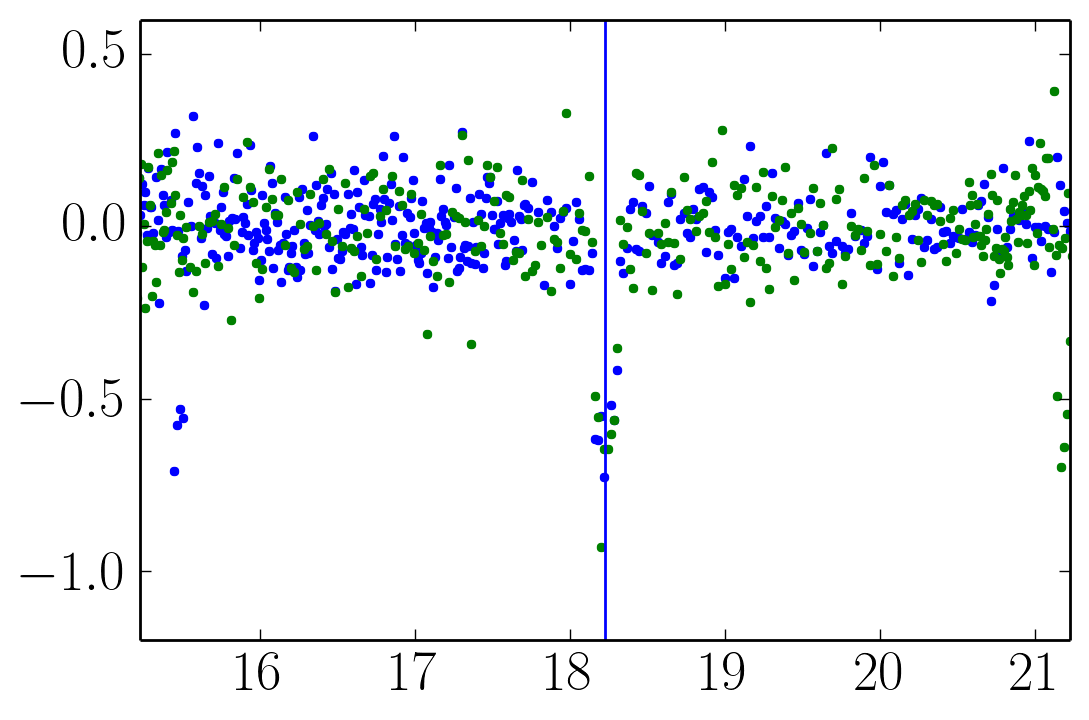

In [10]:
p = r.peaks[2]

s = SimpleSystem(period=p["transit_period"],
                 t0=p["transit_t0"],
                 ror=p["transit_ror"],
                 impact=p["transit_b"],
                 duration=p["transit_duration"],
                 q1=p["transit_q1"],
                 q2=p["transit_q2"])

[pl.plot(lc.time % (p["transit_period"]), lc.flux - lc.predict(lc.flux - 1e3*(s.light_curve(lc.time)-1.0)), ".") for lc in lcs]
pl.gca().axvline(p["transit_t0"]);
pl.xlim(p["transit_t0"]-3, p["transit_t0"]+3)